In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading CSV for 30 patients
data = pd.read_csv('lstm_analysis.csv')
#Replacing -999 with NaN values
data.fillna(-999,inplace=True)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (17,18,21,25,30,32,33,44,49,50,51,54,64,68,69,70,72,74,88,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'abd_difference_y', 'abdomen_girth',
       'actual_DOA', 'actual_DOB', 'apgar_fivemin', 'apgar_onemin',
       'apgar_tenmin', 'baby_type', 'birthheadcircumference', 'birthlength',
       'birthweight', 'central_temp', 'centraltemp', 'conception_type',
       'cont_time', 'creationtime_x', 'creationtime_y', 'currentdateheight',
       'currentdateweight', 'date', 'day', 'day_1', 'day_x', 'day_y', 'dia_bp',
       'dischargeddate', 'dischargestatus', 'dischargestatus_x',
       'dischargestatus_y', 'ecg_resprate', 'entry_timestamp', 'entrydate_x',
       'entrydate_y', 'entrydatetime', 'fio2', 'gender', 'gestation',
       'gestationdaysbylmp', 'gestationweekbylmp', 'heartrate', 'hour',
       'hour_series_x', 'hour_series_y', 'inout_patient_status', 'los', 'map',
       'mean_bp', 'medicationtype', 'medicinename', 'medicineorderdate',
       'minvol', 'mode_of_delivery', 'modificationtime', 'motherage', 'new_ph',
       'numberofdose', 'peep', 'ph'

In [10]:
cols = ['uhid','pulserate', 'ecg_resprate',
       'spo2', 'heartrate', 'mean_bp', 'sys_bp', 'dia_bp',
       'peep', 'pip', 'map', 'tidalvol', 'minvol', 'ti', 'fio2',
       'abd_difference_y',
       'currentdateheight',
       'currentdateweight','dischargestatus', 
       'new_ph', 
       'rbs',  'stool_day_total', 
       'temp', 'total_intake', 'totalparenteralvolume',
       'tpn-tfl', 'typevalue_Antibiotics','typevalue_Inotropes',
       'urine','gender', 'birthweight',
       'birthlength', 'birthheadcircumference', 'inout_patient_status',
       'gestationweekbylmp', 'gestationdaysbylmp',
       'baby_type', 'central_temp', 'apgar_onemin', 'apgar_fivemin',
       'apgar_tenmin', 'motherage', 'conception_type', 'mode_of_delivery',
       'steroidname', 'numberofdose', 'gestation']

In [11]:
#Divide the data set into two sub sets according to discharge and death
death = data[data['dischargestatus']==1]
dis = data[data['dischargestatus']==0]

In [12]:
#Calculating Length
n_dis = len(dis)
n_dea = len(death)

uhid 0 0.0
pulserate 85261 20.545957968754895
ecg_resprate 154753 37.29194630063835
spo2 84638 20.395829166435732
heartrate 119894 28.8917217098779
mean_bp 403965 97.34635895483365


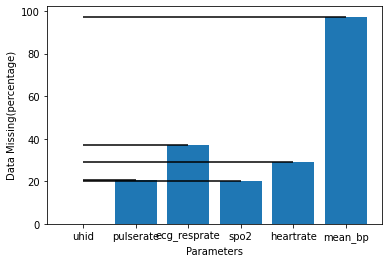

sys_bp 403868 97.32298416538748
dia_bp 403875 97.32467100586297
peep 351450 84.69144073045013
pip 343625 82.80579405605611
map 386277 93.08395405046545
tidalvol 372532 89.7717222882232


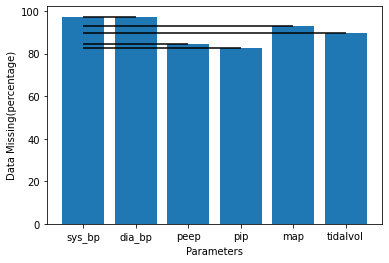

minvol 410289 98.8702988358391
ti 370348 89.24542805986839
fio2 347311 83.69403605501027
abd_difference_y 52670 12.692269692055222
currentdateheight 72111 17.37710764692983
currentdateweight 0 0.0


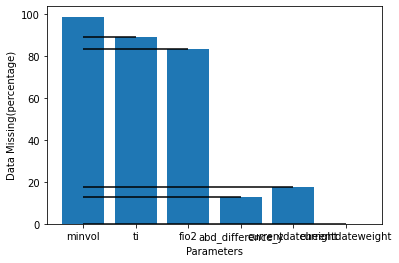

dischargestatus 0 0.0
new_ph 411101 99.06597233099666
rbs 25676 6.18733086412018
stool_day_total 0 0.0
temp 84504 20.363538220190517
total_intake 5623 1.3550148562450448


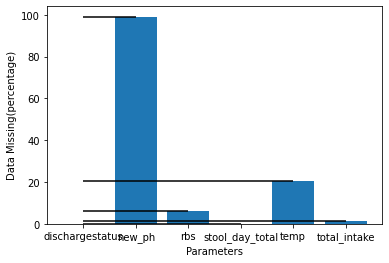

totalparenteralvolume 8272 1.9933634876149762
tpn-tfl 8272 1.9933634876149762
typevalue_Antibiotics 404389 97.44853329220655
typevalue_Inotropes 407102 98.10230446506674
urine 312777 75.37212905775502
gender 0 0.0


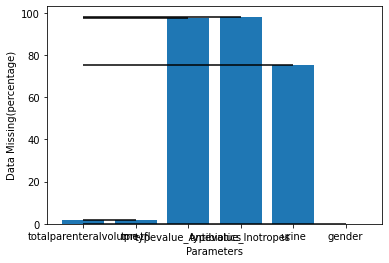

birthweight 0 0.0
birthlength 392876 94.67416266443682
birthheadcircumference 267637 64.49441776291216
inout_patient_status 0 0.0
gestationweekbylmp 0 0.0
gestationdaysbylmp 0 0.0


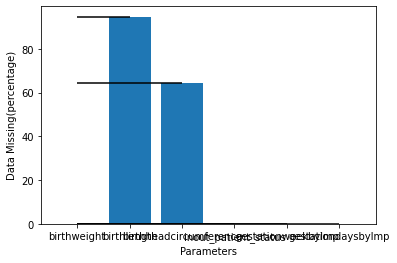

baby_type 0 0.0
central_temp 335535 80.85628842080405
apgar_onemin 86735 20.901158377452244
apgar_fivemin 86735 20.901158377452244
apgar_tenmin 349743 84.28009263163983
motherage 100896 24.31363665938112


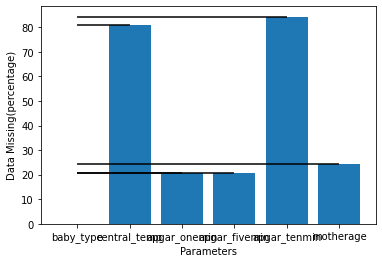

conception_type 0 0.0
mode_of_delivery 0 0.0
steroidname 0 0.0
numberofdose 226722 54.63483518363669
gestation 0 0.0


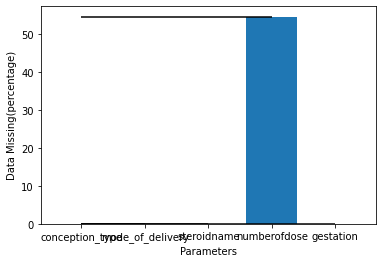

In [13]:
#Plotting Graphs and calculating imputation of each variable for death cases
x_series = []
y_series = []
counter = -1
for i in cols:
    counter = counter + 1
        
    if(counter == 6):
        plt.bar(x_series,y_series,align='center') # A bar chart
        plt.xlabel('Parameters')
        plt.ylabel('Data Missing(percentage)')
        for inner in range(len(y_series)):
            plt.hlines(y_series[inner],0,x_series[inner]) # Here you are drawing the horizontal lines
        plt.show()
        x_series = []
        y_series = []
        counter = 0
    x_series.append(i)
    y_series.append(((len(death[death[i]==-999]))/n_dea)*100)
    print(i,(len(death[death[i]==-999])),((len(death[death[i]==-999]))/n_dea)*100)
    
if(counter > 0):
    plt.bar(x_series,y_series,align='center') # A bar chart
    plt.xlabel('Parameters')
    plt.ylabel('Data Missing(percentage)')
    for inner in range(len(y_series)):
        plt.hlines(y_series[inner],0,x_series[inner]) # Here you are drawing the horizontal lines
    plt.show()
    x_series = []
    y_series = []
    counter = 0
  









In [14]:
#Calculating imputation of each variable for Discharge cases
for i in cols:
    print(i,(len(dis[dis[i]==-999])),((len(dis[dis[i]==-999]))/len(dis))*100)

uhid 0 0.0
pulserate 364212 31.501323323357955
ecg_resprate 595911 51.54136899098756
spo2 362541 31.35679565465585
heartrate 348143 30.111487830614607
mean_bp 1150327 99.4937639467903
sys_bp 1150313 99.4925530626719
dia_bp 1150315 99.49272604611738
peep 1131601 97.8741199467211
pip 1131407 97.85734055250911
map 1102319 95.34146932138594
tidalvol 1143195 98.87690498019339
minvol 1152860 99.71284748049611
ti 1142668 98.8313238423083
fio2 1088302 94.12911484370946
abd_difference_y 15 0.0012973758411320038
currentdateheight 0 0.0
currentdateweight 0 0.0
dischargestatus 0 0.0
new_ph 1155159 99.91169195108029
rbs 24856 2.149838260478472
stool_day_total 0 0.0
temp 197912 17.117749831341143
total_intake 4225 0.36542752858551436
totalparenteralvolume 5006 0.4329775640471207
tpn-tfl 5006 0.4329775640471207
typevalue_Antibiotics 1141629 98.74145894237921
typevalue_Inotropes 1156180 100.0
urine 804052 69.54384265425799
gender 0 0.0
birthweight 0 0.0
birthlength 907367 78.47973498936152
birthheadci